In [1]:
import os                                                   # to set current working directory 
import numpy as np                                          # arrays and matrix math
import scipy.stats as st                                    # statistical methods
import pandas as pd                                         # DataFrames
import matplotlib.pyplot as plt                             # for plotting
from sklearn.linear_model import LinearRegression           # linear regression with scikit learn
from sklearn.preprocessing import PolynomialFeatures        # polynomial basis expansion
from scipy import stats                                     # statistical summary from a 2D ndarray
import seaborn as sns 

In [2]:
df = pd.read_excel("Eagle_Ford_Polygonal.xls")                    # read a .csv file in as a DataFrame                                     # display first 4 samples in the table as a preview
df.head() 

,County,Norm Years,Norm Prod
0,DeWitt,0.0,0.000000
1,DeWitt,0.2,0.172625
2,DeWitt,0.4,0.172625
3,DeWitt,0.6,0.392014
4,DeWitt,0.8,0.654012


In [61]:
depth = df['Norm Years'].iloc[:30]
Npor = df['Norm Prod'].iloc[:30]
depth.tail()

25    1.0
26    1.2
27    1.4
28    1.6
29    1.8
Name: Norm Years, dtype: float64

In [62]:
lin = LinearRegression() 
lin.fit(depth.values.reshape(-1, 1), Npor) 
slope = lin.coef_[0]
intercept = lin.intercept_

print('The model parameters are, slope (b1) = ' + str(round(slope,2)) + ', and the intercept (b0) = ' + str(round(intercept,2)))

The model parameters are, slope (b1) = 0.32, and the intercept (b0) = 0.26


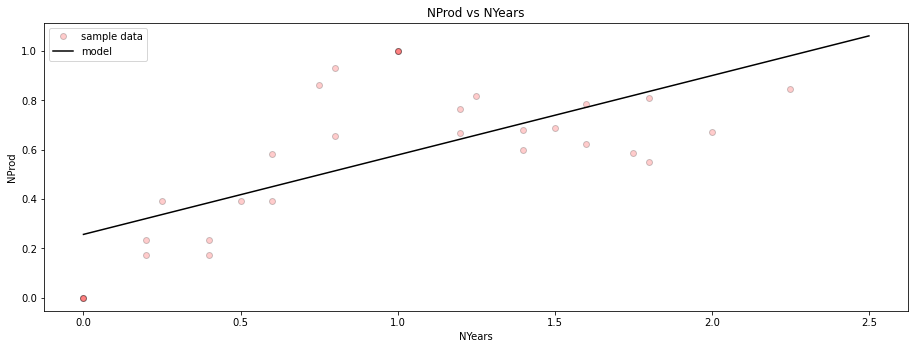

In [63]:
#LINEAR REGRESSION
depth_values = np.linspace(0.0,2.5,100)
plt.subplot(111)
plt.plot(depth, Npor, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.plot(depth_values, intercept + slope*depth_values, label='model', color = 'black')
plt.title('NProd vs NYears')
plt.xlabel('NYears')
plt.ylabel('NProd')
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

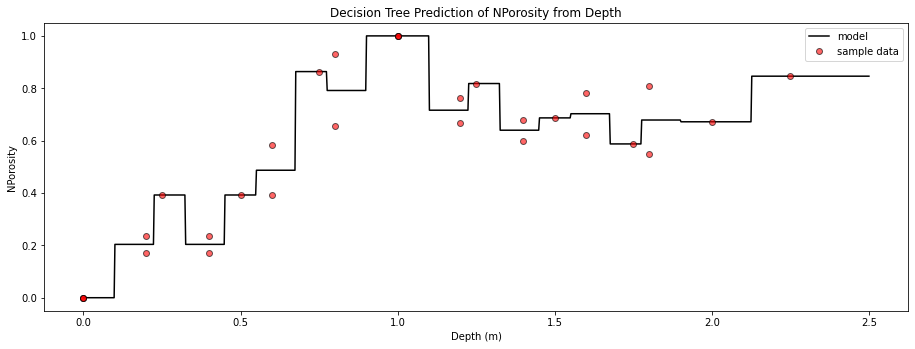

In [64]:
#DECISION TREE
from sklearn import tree                                  # tree program from scikit learn (packag
depth_values = np.linspace(0.0,2.5,1000)
my_tree = tree.DecisionTreeRegressor(min_samples_leaf=1, max_depth = 20)
my_tree = my_tree.fit(depth.values.reshape(-1, 1), Npor)
DT_Npor = my_tree.predict(depth_values.reshape(-1,1))
plt.subplot(111)
plt.plot(depth_values, DT_Npor, label='model', color = 'black')
plt.plot(depth, Npor, 'o', label='sample data', color = 'red', alpha = 0.6, markeredgecolor = 'black')
plt.title('Decision Tree Prediction of NPorosity from Depth')
plt.xlabel('Depth (m)')
plt.ylabel('NPorosity')
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

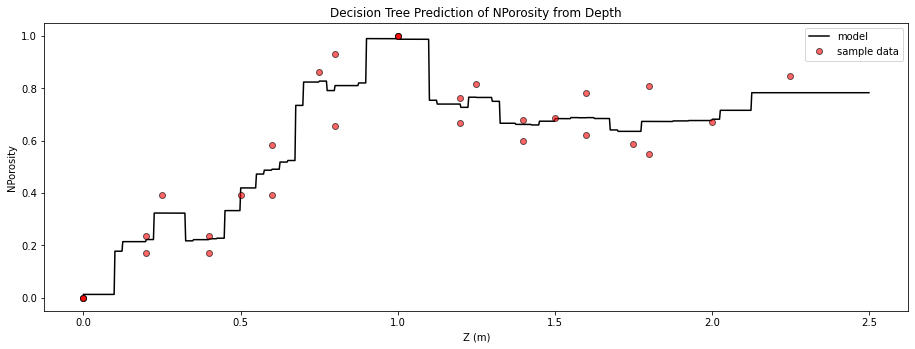

In [65]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor          # random forest method
seed = 73093                                                # set the random forest hyperparameters
max_depth = 5
num_tree = 1000
max_features = 1

my_forest = RandomForestRegressor(max_depth=max_depth, random_state=seed,n_estimators=num_tree, max_features=max_features)
my_forest.fit(X = depth.values.reshape(-1, 1), y = Npor)  
RF_Npor = my_forest.predict(depth_values.reshape(-1,1))
plt.subplot(111)
plt.plot(depth_values, RF_Npor, label='model', color = 'black')
plt.plot(depth, Npor, 'o', label='sample data', color = 'red', alpha = 0.6, markeredgecolor = 'black')
plt.title('Decision Tree Prediction of NPorosity from Depth')
plt.xlabel('Z (m)')
plt.ylabel('NPorosity')
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

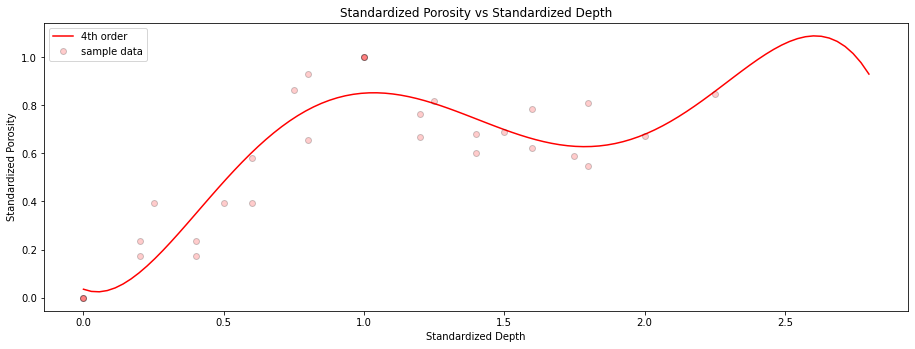

In [66]:
#5th degree
poly4 = PolynomialFeatures(degree = 5) 
depth_ns_poly4 = poly4.fit_transform(depth.values.reshape(-1, 1)) 
df_depth_ns_poly4 = pd.DataFrame({'Values':depth.values,'0th': depth_ns_poly4[:,0],'1st': depth_ns_poly4[:,1],'2nd': depth_ns_poly4[:,2], '3rd': depth_ns_poly4[:,3], '4th': depth_ns_poly4[:,4], '5th': depth_ns_poly4[:,5]}) # make a new DataFrame from the vectors
df_depth_ns_poly4.head()

depth_ns_values = np.linspace(0,2.8,100)
lin_poly4 = LinearRegression() 
lin_poly4.fit(df_depth_ns_poly4.iloc[:,1:], Npor) 
plt.subplot(111)
plt.plot(depth_ns_values, lin_poly4.predict(poly4.fit_transform(depth_ns_values.reshape(-1, 1))), label='4th order',color = 'red') 
plt.plot(depth, Npor, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.title('Standardized Porosity vs Standardized Depth')
plt.xlabel('Standardized Depth')
plt.ylabel('Standardized Porosity')
#plt.xlim(-2,2); plt.ylim(-2,2)
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

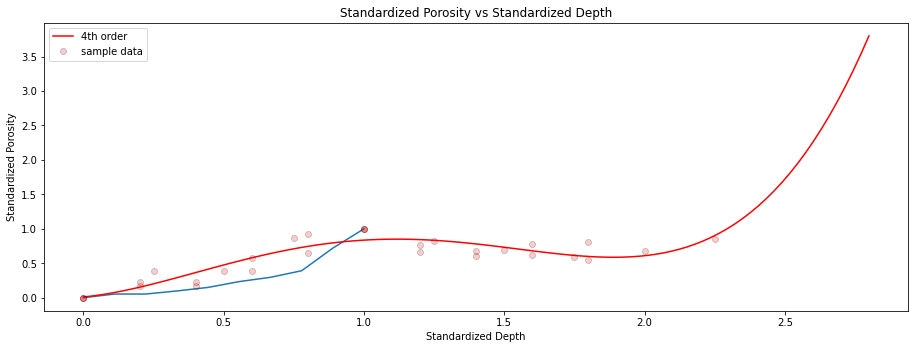

In [75]:
#4th degree
poly4 = PolynomialFeatures(degree = 4) 
depth_ns_poly4 = poly4.fit_transform(depth.values.reshape(-1, 1)) 
df_depth_ns_poly4 = pd.DataFrame({'Values':depth.values,'0th': depth_ns_poly4[:,0],'1st': depth_ns_poly4[:,1],'2nd': depth_ns_poly4[:,2], '3rd': depth_ns_poly4[:,3], '4th': depth_ns_poly4[:,4]}) # make a new DataFrame from the vectors
df_depth_ns_poly4.head()

depth_ns_values = np.linspace(0,2.8,100)
lin_poly4 = LinearRegression() 
lin_poly4.fit(df_depth_ns_poly4.iloc[:,1:], Npor) 
plt.subplot(111)
plt.plot(df['Norm Years'].iloc[30:], df['Norm Prod'].iloc[30:])
plt.plot(depth_ns_values, lin_poly4.predict(poly4.fit_transform(depth_ns_values.reshape(-1, 1))), label='4th order',color = 'red') 
plt.plot(depth, Npor, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.title('Standardized Porosity vs Standardized Depth')
plt.xlabel('Standardized Depth')
plt.ylabel('Standardized Porosity')
#plt.xlim(-2,2); plt.ylim(-2,2)
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

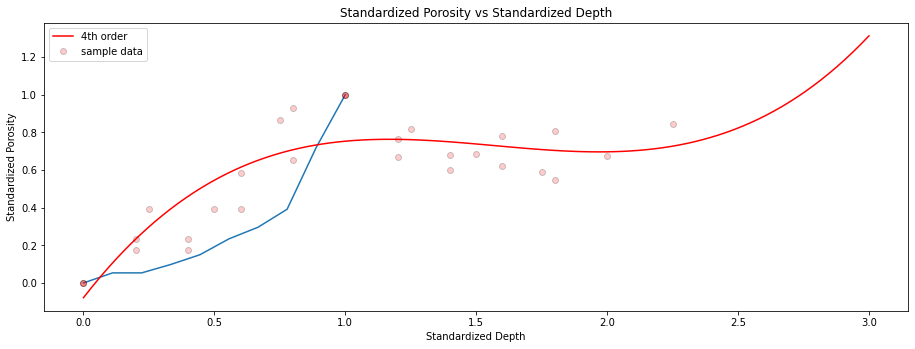

In [74]:
#3rd Degree
poly4 = PolynomialFeatures(degree = 3) 
depth_ns_poly4 = poly4.fit_transform(depth.values.reshape(-1, 1)) 
df_depth_ns_poly4 = pd.DataFrame({'Values':depth.values,'0th': depth_ns_poly4[:,0],'1st': depth_ns_poly4[:,1],'2nd': depth_ns_poly4[:,2], '3rd': depth_ns_poly4[:,3]}) # make a new DataFrame from the vectors
df_depth_ns_poly4.head()

depth_ns_values = np.linspace(0,3,100)
lin_poly4 = LinearRegression() 
lin_poly4.fit(df_depth_ns_poly4.iloc[:,1:], Npor) 
plt.subplot(111)
plt.plot(df['Norm Years'].iloc[30:], df['Norm Prod'].iloc[30:])
plt.plot(depth_ns_values, lin_poly4.predict(poly4.fit_transform(depth_ns_values.reshape(-1, 1))), label='4th order',color = 'red') 
plt.plot(depth, Npor, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.title('Standardized Porosity vs Standardized Depth')
plt.xlabel('Standardized Depth')
plt.ylabel('Standardized Porosity')
#plt.xlim(-2,2); plt.ylim(-2,2)
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

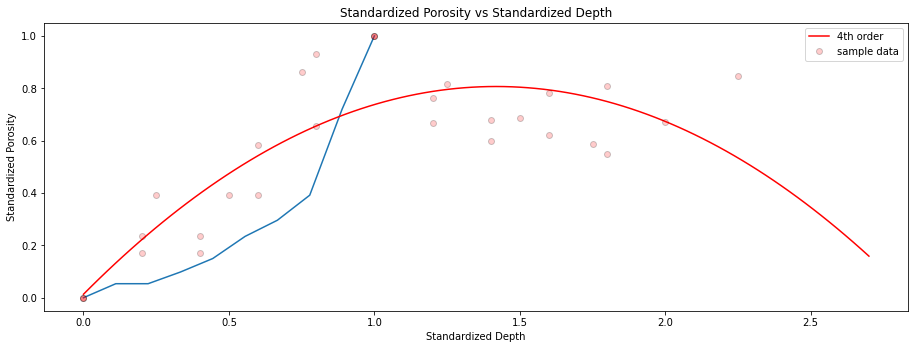

In [76]:
#2nd Degree
poly4 = PolynomialFeatures(degree = 2) 
depth_ns_poly4 = poly4.fit_transform(depth.values.reshape(-1, 1)) 
df_depth_ns_poly4 = pd.DataFrame({'Values':depth.values,'0th': depth_ns_poly4[:,0],'1st': depth_ns_poly4[:,1],'2nd': depth_ns_poly4[:,2]}) # make a new DataFrame from the vectors
df_depth_ns_poly4.head()

depth_ns_values = np.linspace(0,2.7,100)
lin_poly4 = LinearRegression() 
lin_poly4.fit(df_depth_ns_poly4.iloc[:,1:], Npor) 
plt.subplot(111)
plt.plot(df['Norm Years'].iloc[30:], df['Norm Prod'].iloc[30:])
plt.plot(depth_ns_values, lin_poly4.predict(poly4.fit_transform(depth_ns_values.reshape(-1, 1))), label='4th order',color = 'red') 
plt.plot(depth, Npor, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.title('Standardized Porosity vs Standardized Depth')
plt.xlabel('Standardized Depth')
plt.ylabel('Standardized Porosity')
#plt.xlim(-2,2); plt.ylim(-2,2)
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

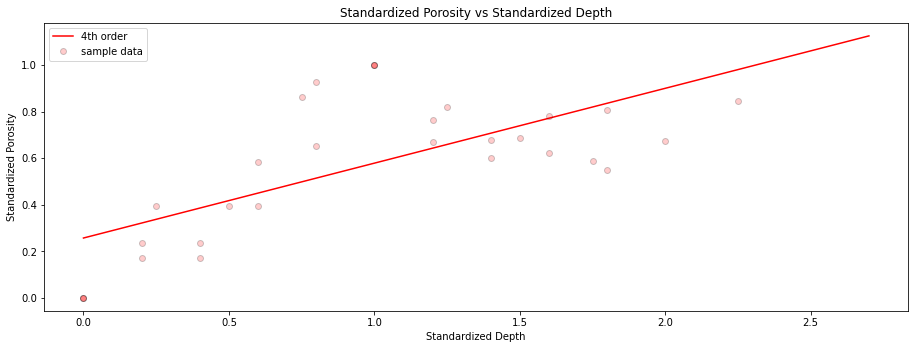

In [70]:
#1st Degree
poly4 = PolynomialFeatures(degree = 1) 
depth_ns_poly4 = poly4.fit_transform(depth.values.reshape(-1, 1)) 
df_depth_ns_poly4 = pd.DataFrame({'Values':depth.values,'0th': depth_ns_poly4[:,0],'1st': depth_ns_poly4[:,1]}) # make a new DataFrame from the vectors
df_depth_ns_poly4.head()

depth_ns_values = np.linspace(0,2.7,100)
lin_poly4 = LinearRegression() 
lin_poly4.fit(df_depth_ns_poly4.iloc[:,1:], Npor) 
plt.subplot(111)
plt.plot(depth_ns_values, lin_poly4.predict(poly4.fit_transform(depth_ns_values.reshape(-1, 1))), label='4th order',color = 'red') 
plt.plot(depth, Npor, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.title('Standardized Porosity vs Standardized Depth')
plt.xlabel('Standardized Depth')
plt.ylabel('Standardized Porosity')
#plt.xlim(-2,2); plt.ylim(-2,2)
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

In [71]:
import numpy as np  

# functions taken (without modification) from http://davmre.github.io/blog/python/2013/12/15/orthogonal_poly
# appreciation to Dave Moore for the great blog post on titled 'Orthogonal polynomial regression in Python'
# functions are Dave's reimplimentation of poly() from R

def ortho_poly_fit(x, degree = 1):
    n = degree + 1
    x = np.asarray(x).flatten()
    if(degree >= len(np.unique(x))):
            stop("'degree' must be less than number of unique points")
    xbar = np.mean(x)
    x = x - xbar
    X = np.fliplr(np.vander(x, n))
    q,r = np.linalg.qr(X)

    z = np.diag(np.diag(r))
    raw = np.dot(q, z)

    norm2 = np.sum(raw**2, axis=0)
    alpha = (np.sum((raw**2)*np.reshape(x,(-1,1)), axis=0)/norm2 + xbar)[:degree]
    Z = raw / np.sqrt(norm2)
    return Z, norm2, alpha

def ortho_poly_predict(x, alpha, norm2, degree = 1):
    x = np.asarray(x).flatten()
    n = degree + 1
    Z = np.empty((len(x), n))
    Z[:,0] = 1
    if degree > 0:
        Z[:, 1] = x - alpha[0]
    if degree > 1:
      for i in np.arange(1,degree):
          Z[:, i+1] = (x - alpha[i]) * Z[:, i] - (norm2[i] / norm2[i-1]) * Z[:, i-1]
    Z /= np.sqrt(norm2)
    return Z

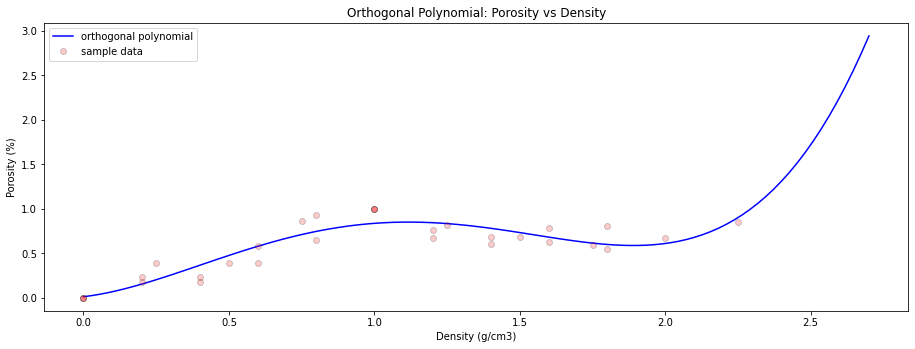

In [72]:
depth_ns_ortho4, norm2, alpha = ortho_poly_fit(depth.values.reshape(-1, 1), degree = 4)
df_depth_ns_ortho4 = pd.DataFrame({'value':depth.values,'0th': depth_ns_ortho4[:,0],'1st': depth_ns_ortho4[:,1],'2nd': depth_ns_ortho4[:,2], '3rd': depth_ns_ortho4[:,3], '4th': depth_ns_ortho4[:,4]}) # make a new DataFrame from the vectors
df_depth_ns_ortho4.head()

ortho_poly_ns_values = ortho_poly_predict(depth_ns_values.reshape(-1, 1), alpha, norm2, degree = 4)
lin_ortho4 = LinearRegression() 
lin_ortho4.fit(df_depth_ns_ortho4.iloc[:,1:], Npor) 
plt.subplot(111)

plt.plot(depth_ns_values, lin_ortho4.predict(ortho_poly_ns_values), color = 'blue', label = 'orthogonal polynomial') 
plt.plot(depth, Npor, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.title('Orthogonal Polynomial: Porosity vs Density')
plt.xlabel('Density (g/cm3)')
plt.ylabel('Porosity (%)')
#plt.xlim(-2,2); plt.ylim(-2,2)
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

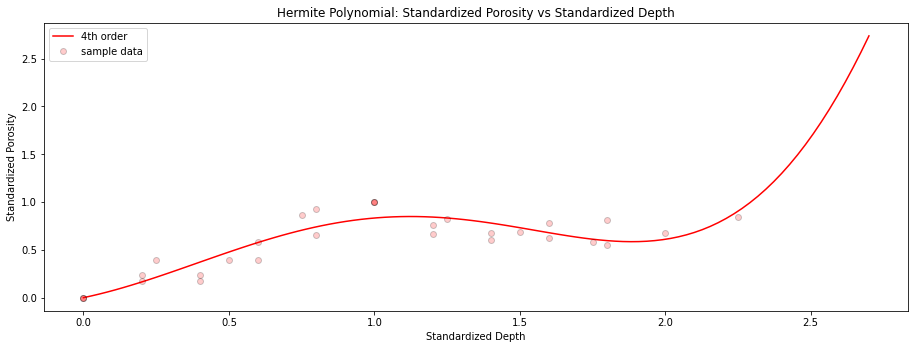

In [73]:
import scipy
orders4 = [0,1,2,6,7]
depth_ns_hermite4 = scipy.special.eval_hermitenorm(orders4, depth.values.reshape(-1, 1), out=None) 
df_depth_ns_hermite4 = pd.DataFrame({'value':depth.values,'0th': depth_ns_hermite4[:,0],'1st': depth_ns_hermite4[:,1],'2nd': depth_ns_hermite4[:,2], '5th': depth_ns_hermite4[:,3], '6th': depth_ns_hermite4[:,4]}) # make a new DataFrame from the vectors
df_depth_ns_hermite4.head()

lin_herm4 = LinearRegression() 
lin_herm4.fit(df_depth_ns_hermite4.iloc[:,1:], Npor) 
plt.subplot(111)
plt.plot(depth_ns_values, lin_herm4.predict(scipy.special.eval_hermitenorm(orders4, depth_ns_values.reshape(-1, 1), out=None)), label='4th order',color = 'red') 
plt.plot(depth, Npor, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.title('Hermite Polynomial: Standardized Porosity vs Standardized Depth')
plt.xlabel('Standardized Depth')
plt.ylabel('Standardized Porosity')
#plt.xlim(-2,2); plt.ylim(-2,2)
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()